# Clustering Crime Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
crime=pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# EDA

In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# Visualization

<AxesSubplot:xlabel='Rape', ylabel='Density'>

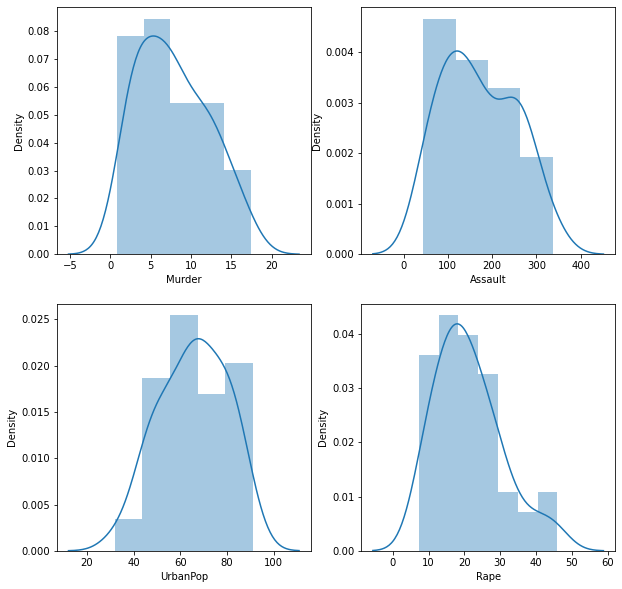

In [5]:
fig,axis=plt.subplots(2,2,figsize=(10,10))
sns.distplot(crime["Murder"],ax=axis[0,0])
sns.distplot(crime["Assault"],ax=axis[0,1])
sns.distplot(crime["UrbanPop"],ax=axis[1,0])
sns.distplot(crime["Rape"],ax=axis[1,1])

# <span style="color:Red">Hierarchical Clustering</span>

In [6]:
hierarchical=crime.iloc[:,1:]
hierarchical.head(2)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5


#### Nomalizing Data

In [7]:
from sklearn.preprocessing import MinMaxScaler
normalize=MinMaxScaler()

In [8]:
hier_n=normalize.fit_transform(hierarchical)

In [9]:
hier_df=pd.DataFrame(hier_n,columns=hierarchical.columns)
hier_df.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


#### Looking at dendrogram for number of clusters

In [10]:
import scipy.cluster.hierarchy as sc  ## For dendrogram
from sklearn.cluster import AgglomerativeClustering    ## For Model Building

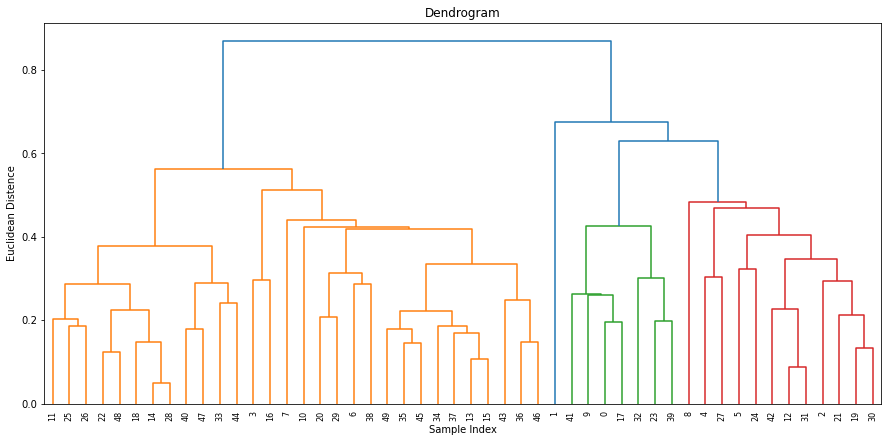

In [11]:
plt.figure(figsize=(15,7))
sc.dendrogram(sc.linkage(hier_df,method="average"))
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Euclidean Distence")
plt.show()

#### Here, although point with index 1 looks like an outlier let's try with n_clusters as 2

# Model Training

In [12]:
hc=AgglomerativeClustering(n_clusters=2, affinity="euclidean",linkage="average")

In [13]:
y_hc=hc.fit_predict(hier_df)
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [14]:
h_cluster=pd.DataFrame(data=y_hc,columns=["H_Cluster"])

In [15]:
h_cluster.head()

,H_Cluster
0,0
1,0
2,0
3,1
4,0


In [16]:
print(hc.labels_)

[0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1]


In [17]:
hierarchical["h_cluster"]=h_cluster

In [18]:
hierarchical.head()

,Murder,Assault,UrbanPop,Rape,h_cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0


Text(0.5, 1.0, ' Clusterd Data')

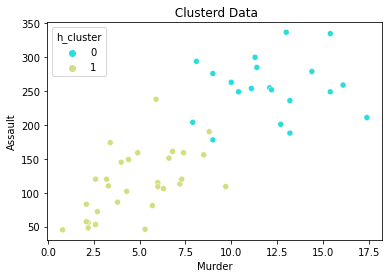

In [19]:
sns.scatterplot(x="Murder",y="Assault",data=hierarchical,hue="h_cluster",palette="rainbow").set_title(" Clusterd Data")

# <span style="color:Red">K-Means Clustering</span>

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [21]:
kmean_data=pd.read_csv("crime_data.csv")

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
scale_kmean=scaler.fit_transform(kmean_data.iloc[:,1:])

In [25]:
clusters=7
wcd=[]  ## with-cluster distance
silhouettescore=[]  ## to evaluate 
calinskiharabaszscore=[]  ## to evaluate
for k in range(1,clusters+1):
    kmean_model=KMeans(n_clusters=k,random_state=10)
    kmean_model.fit(scale_kmean)
    wcd.append(kmean_model.inertia_)

    if k==1:
        continue #min 2 labels needed for silhoutte and cal_haz score 
    silhouettescore.append(silhouette_score(scale_kmean,kmean_model.labels_))
    calinskiharabaszscore.append(calinski_harabasz_score(scale_kmean,kmean_model.labels_))

In [26]:
metrics=pd.DataFrame({"K":[2,3,4,5,6,7],"Silhouette Score":silhouettescore,"Calinski-Harabasz Score":calinskiharabaszscore})
metrics

,K,Silhouette Score,Calinski-Harabasz Score
0,2,0.408489,43.461992
1,3,0.308136,35.187135
2,4,0.339689,37.949721
3,5,0.313354,33.683001
4,6,0.296752,30.446848
5,7,0.263545,27.625089


### Number of clusters 2 and 4 looks good

## Checking Elbow Curve

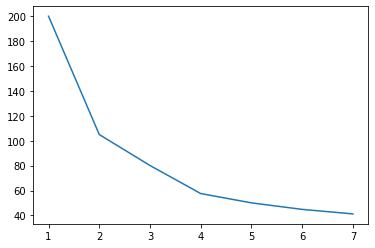

In [27]:
plt.plot(np.arange(1,8),wcd)

#### Looking to the elbow curve we can take k as 4

### Clusters for k as 2 and 4

In [28]:
final_k2_model=KMeans(n_clusters=2,random_state=10)
final_k2_model.fit(scale_kmean)

KMeans(n_clusters=2, random_state=10)

In [29]:
final_k4_model=KMeans(n_clusters=4,random_state=10)
final_k4_model.fit(scale_kmean)

KMeans(n_clusters=4, random_state=10)

<AxesSubplot:xlabel='Assault', ylabel='Murder'>

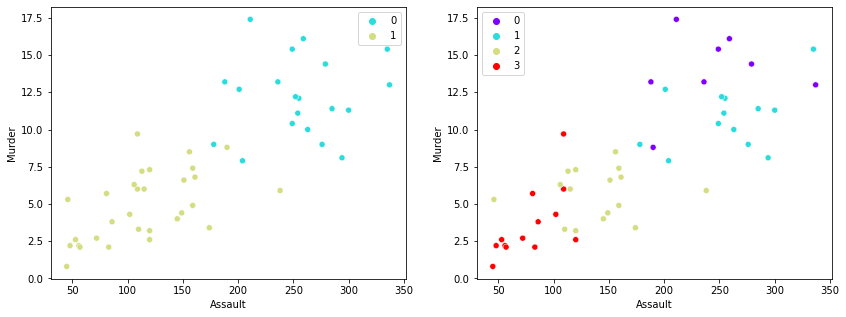

In [30]:
fig,axis=plt.subplots(1,2,figsize=(14,5))
sns.scatterplot(x="Assault",y="Murder",hue=final_k2_model.labels_,data=kmean_data,palette="rainbow",ax=axis[0])
sns.scatterplot(x="Assault",y="Murder",hue=final_k4_model.labels_,data=kmean_data,palette="rainbow",ax=axis[1])

### With K-mean as well, 2 clusters are showing good output

# <span style="color:Red">DBSCAN Clustering</span>

In [31]:
dbscan_data=pd.read_csv("crime_data.csv")
dbscan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [32]:
dbscan_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


<AxesSubplot:>

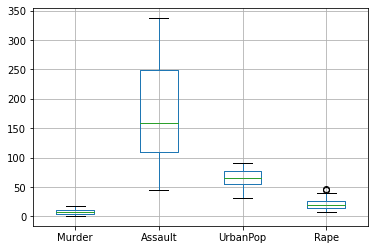

In [33]:
dbscan_data.iloc[:,1:].boxplot()

<AxesSubplot:>

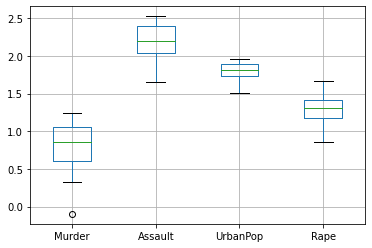

In [34]:
dbscan_data.iloc[:,1:].apply(np.log10).boxplot()

####  Standardizing

In [35]:
scaler=StandardScaler()
scaled_dbscan=scaler.fit_transform(dbscan_data.iloc[:,1:])

In [36]:
from sklearn.cluster import DBSCAN

In [37]:
np.arange(0.1,10,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [38]:
n=2
while n<6:
    for e in np.arange(0.1,1,0.1):
        dbscan_model=DBSCAN(eps=e,min_samples=n)
        dbscan_model.fit(scaled_dbscan)
        print("For eps {} and min_samle {}".format(e,n))
        print(dbscan_model.labels_)
        print("---------------------------------------")
    n+=1

For eps 0.1 and min_samle 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
---------------------------------------
For eps 0.2 and min_samle 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
---------------------------------------
For eps 0.30000000000000004 and min_samle 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
---------------------------------------
For eps 0.4 and min_samle 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
---------------------------------------
For eps 0.5 and min_samle 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  1  2  1 -1 -1 -1 -1 -1 -1  

### Here, we can see that for eps=0.8,0.9 are giving decent values and min samples=2,3 are showing good results

### Let's Try to visualizing with these parameters

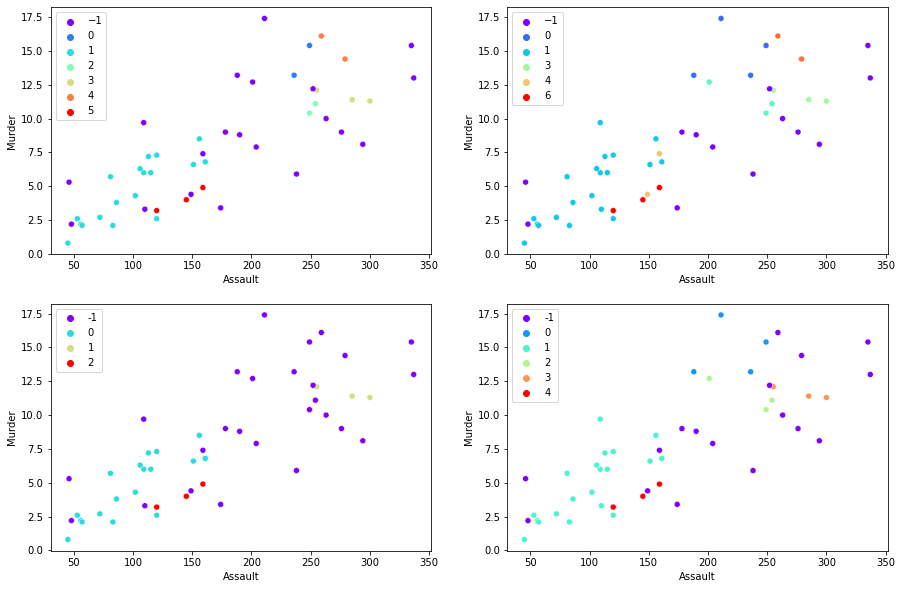

In [39]:
n=2
fig,axis=plt.subplots(2,2,figsize=(15,10))
a=0
ep=[0.8,0.9]
while n<4:
    b=0
    for e in ep:
        dbscan_model=DBSCAN(eps=e,min_samples=n)
        dbscan_model.fit(scaled_dbscan)
        sns.scatterplot(x="Assault",y="Murder",hue=dbscan_model.labels_,data=dbscan_data,palette="rainbow",ax=axis[a,b])
        b+=1
    n+=1
    a+=1


## As the data points are very less, k-mean and hirarchical are giving better results and dbscan is performing poor